# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first

Given a list of values, there are several ways to count the frequency of each value.

In [2]:
t = [1, 2, 2, 3, 5]

You can use a Python dictionary:

In [6]:
hist = {}
for x in t:
    hist[x] = hist.get(x, 0) + 1
    
hist

{1: 1, 2: 2, 3: 1, 5: 1}

You can use a `Counter` (which is a dictionary with additional methods):

In [7]:
from collections import Counter
counter = Counter(t)
counter

Counter({1: 1, 2: 2, 3: 1, 5: 1})

Or you can use the `Hist` object provided by `thinkstats2`:

In [8]:
import thinkstats2
hist = thinkstats2.Hist([1, 2, 2, 3, 5])
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

`Hist` provides `Freq`, which looks up the frequency of a value.

In [9]:
hist.Freq(2)

2

You can also use the bracket operator, which does the same thing.

In [10]:
hist[2]

2

If the value does not appear, it has frequency 0.

In [11]:
hist[4]

0

The `Values` method returns the values:

In [12]:
hist.Values()

dict_keys([1, 2, 3, 5])

So you can iterate the values and their frequencies like this:

In [10]:
for val in sorted(hist.Values()):
    print(val, hist[val])

1 1
2 2
3 1
5 1


Or you can use the `Items` method:

In [11]:
for val, freq in hist.Items():
     print(val, freq)

1 1
2 2
3 1
5 1


`thinkplot` is a wrapper for `matplotlib` that provides functions that work with the objects in `thinkstats2`.

For example `Hist` plots the values and their frequencies as a bar graph.

`Config` takes parameters that label the x and y axes, among other things.

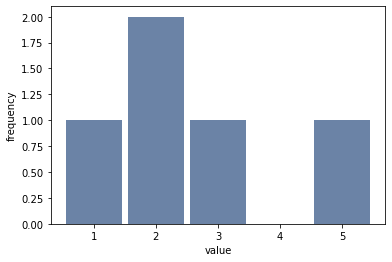

In [13]:
import thinkplot
thinkplot.Hist(hist)
thinkplot.Config(xlabel='value', ylabel='frequency')

As an example, I'll replicate some of the figures from the book.

First, I'll load the data from the pregnancy file and select the records for live births.

In [16]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

Here's the histogram of birth weights in pounds.  Notice that `Hist` works with anything iterable, including a Pandas Series.  The `label` attribute appears in the legend when you plot the `Hist`. 

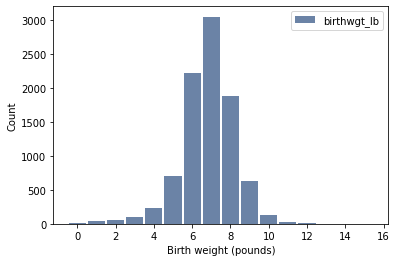

In [17]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

Before plotting the ages, I'll apply `floor` to round down:

In [15]:
ages = np.floor(live.agepreg)

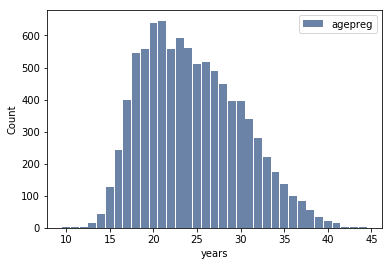

In [16]:
hist = thinkstats2.Hist(ages, label='agepreg')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='years', ylabel='Count')

As an exercise, plot the histogram of pregnancy lengths (column `prglngth`).

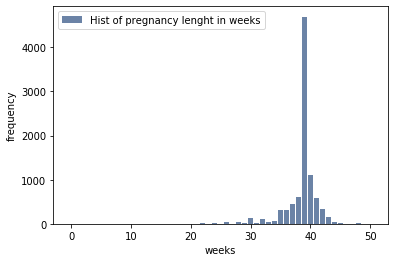

<Figure size 576x432 with 0 Axes>

In [29]:
# Solution goes here
plength = live.prglngth

hist = thinkstats2.Hist(plength, label = 'Hist of pregnancy lenght in weeks')
thinkplot.Hist(hist)
thinkplot.Show(xlabel = 'weeks', ylabel = 'frequency')

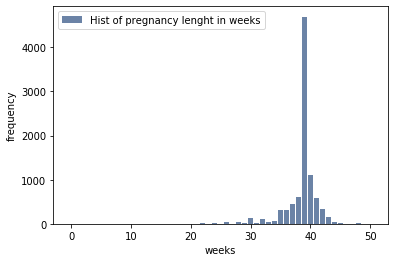

In [33]:
#Another way of plotting the hist:
hist = thinkstats2.Hist(live.prglngth, label = 'Hist of pregnancy lenght in weeks')
thinkplot.Hist(hist)
thinkplot.Config(xlabel = 'weeks', ylabel = 'frequency')

`Hist` provides smallest, which select the lowest values and their frequencies.

In [18]:
for weeks, freq in hist.Smallest(10):
    print(weeks, freq)

10.0 2
11.0 1
12.0 1
13.0 14
14.0 43
15.0 128
16.0 242
17.0 398
18.0 546
19.0 559


Use `Largest` to display the longest pregnancy lengths.

In [34]:
# Solution goes here
for weeks, freq in hist.Largest(10):
    print(weeks, freq)

50 2
48 7
47 1
46 1
45 10
44 46
43 148
42 328
41 587
40 1116


From live births, we can select first babies and others using `birthord`, then compute histograms of pregnancy length for the two groups.

In [41]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = thinkstats2.Hist(firsts.prglngth, label='first')
other_hist = thinkstats2.Hist(others.prglngth, label='other')

We can use `width` and `align` to plot two histograms side-by-side.

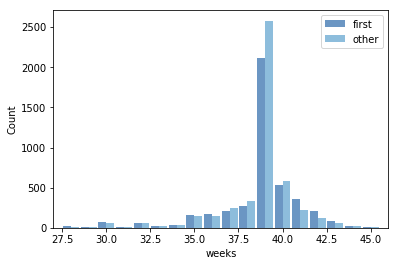

In [21]:
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count', xlim=[27, 46])

`Series` provides methods to compute summary statistics:

In [38]:
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()

Here are the mean and standard deviation:

In [36]:
mean, std

(38.56055968517709, 2.702343810070587)

As an exercise, confirm that `std` is the square root of `var`:

In [39]:
# Solution goes here
from math import sqrt
std == sqrt(var)

True

Here's are the mean pregnancy lengths for first babies and others:

In [42]:
firsts.prglngth.mean(), others.prglngth.mean()

(38.60095173351461, 38.52291446673706)

And here's the difference (in weeks):

In [43]:
firsts.prglngth.mean() - others.prglngth.mean()

0.07803726677754952

This functon computes the Cohen effect size, which is the difference in means expressed in number of standard deviations:

In [44]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

Compute the Cohen effect size for the difference in pregnancy length for first babies and others.

In [46]:
# Solution goes here
CohenEffectSize(firsts.prglngth, others.prglngth)

0.028879044654449834

## Exercises

Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier than others. 

Compute Cohen’s effect size to quantify the difference between the groups.  How does it compare to the difference in pregnancy length?

In [47]:
# Solution goes here
CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)

-0.08867292707260174

In [48]:
# Solution goes here
#The first babies weight variance is lower than the others. Also the Cohen's effect size is aproximately three times bigger than the pregnancy length one, 
#but still not that much relevant (0.8%). 

For the next few exercises, we'll load the respondent file:

In [49]:
resp = nsfg.ReadFemResp()

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=FEM&section=R&subSec=7876&srtLabel=607543).

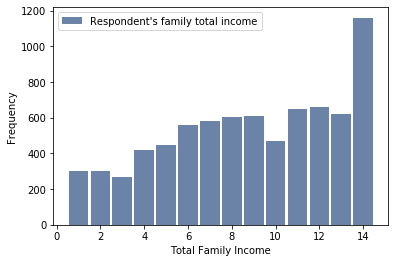

In [51]:
# Solution goes here
hist = thinkstats2.Hist(resp.totincr, label = 'Respondent\'s family total income')
thinkplot.Hist(hist)
thinkplot.Config(xlabel = 'Total Family Income', ylabel = 'Frequency')

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

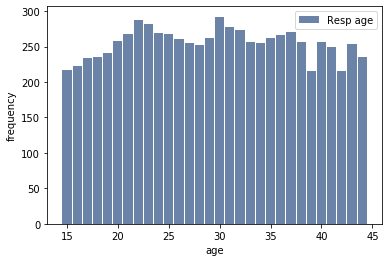

In [55]:
# Solution goes here
hist = thinkstats2.Hist(resp.age_r, label = 'Resp age')
thinkplot.Hist(hist)
thinkplot.Config(xlabel = "age", ylabel = "frequency")

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

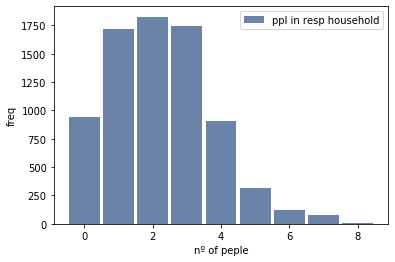

In [56]:
# Solution goes here
hist = thinkstats2.Hist(resp.numfmhh, label = 'ppl in resp household')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='nº of peple', ylabel='freq')

Make a histogram of <tt>parity</tt>, the number of children borne by the respondent.  How would you describe this distribution?

22

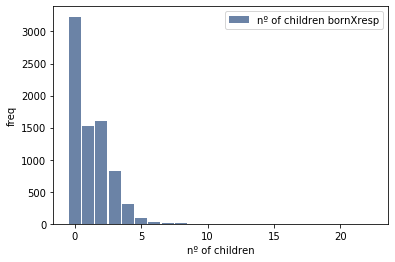

In [60]:
# Solution goes here
hist = thinkstats2.Hist(resp.parity, label = 'nº of children bornXresp')
thinkplot.Hist(hist)
thinkplot.Config(xlabel = 'nº of children', ylabel='freq')
#By far, the mode is 0 children, the distribution is positive skewed, which means that we don't have that much children per family.
#As we see, even to have 4 children is not that much common, and more children is really uncommon. 

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [66]:
# Solution goes here
hist.Largest()

[(22, 1),
 (16, 1),
 (10, 3),
 (9, 2),
 (8, 8),
 (7, 15),
 (6, 29),
 (5, 95),
 (4, 309),
 (3, 828)]

Let's investigate whether people with higher income have higher parity.  Keep in mind that in this study, we are observing different people at different times during their lives, so this data is not the best choice for answering this question.  But for now let's take it at face value.

Use <tt>totincr</tt> to select the respondents with the highest income (level 14).  Plot the histogram of <tt>parity</tt> for just the high income respondents.

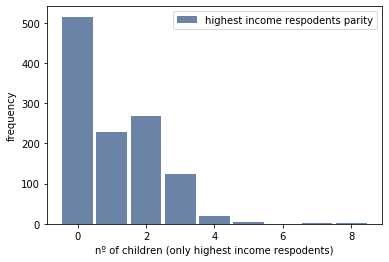

In [67]:
# Solution goes here
hip = resp[resp.totincr == 14]
hist = thinkstats2.Hist(hip.parity, label = 'highest income respodents parity')
thinkplot.Hist(hist)
thinkplot.Config(xlabel = 'nº of children (only highest income respodents)', ylabel = 'frequency')

Find the largest parities for high income respondents.

In [69]:
# Solution goes here
hist.Largest()

[(8, 1), (7, 1), (5, 5), (4, 19), (3, 123), (2, 267), (1, 229), (0, 515)]

Compare the mean <tt>parity</tt> for high income respondents and others.

In [76]:
# Solution goes here
oth = resp[resp.totincr != 14]
print(hip.parity.mean(), oth.parity.mean())
hip.parity.mean() - oth.parity.mean()

1.0758620689655172 1.2495758136665125


-0.17371374470099532

Compute the Cohen effect size for this difference.  How does it compare with the difference in pregnancy length for first babies and others?

In [77]:
# Solution goes here
CohenEffectSize(hip.parity, oth.parity)

-0.12511855314660367

So, here we see that there is more difference. In *prglngth* the difference was only about 0.03, here is 0.125, which means that there is a little std difference. But still little remarkable.

# Answer to exercise 2-1
By looking at our histograms, we can conclude that the distributions have a mode of 39 weeks, that's the central tendency of both. There is no more clusters in both distributions but they are considerably spreaded. There are no tails, probabilities drop off quickly as we move away from our modes. There are some strange values that could be considered outliers since a 50 week pregnancy is really unlikely, I mean... a 12 months pregnancy? So we could consider that approximately from 45 weeks (10.5 months) in advance could be errors.

In terms of prematurity, **should you worry if you are having you first kid?** Not really. The effect size of the variancy between both means is just about a 0.2%, which means that you have nothing to worry about, first babies tend to be born 16 hours earlier than others from the perspective of our mean, which translates to no difference.